# The ``together`` Argument

So far, we have fit the continuum to each line individually. However, MICA2 has the ability to fit multiple lines to the continuum at once with the different transfer functions.

To do this, we set ``together=True`` in the ``mica2_params`` argument dict:

In [ ]:
import pypetal.pipeline as pl


main_dir = 'pypetal/examples/dat/rm160_'
line_names = ['cont', 'hb', 'ha', 'mg2']
filenames = [ main_dir + x + '.dat' for x in line_names ]

output_dir = 'mica2_output4/'




params = {
    'max_num_saves': 2000,
    'together': True
}

res = pl.run_pipeline(output_dir, filenames, line_names,
                      run_mica2=True, mica2_params=params,
                      verbose=True, plot=True, time_unit='d',
                      file_fmt='ascii', lag_bounds=[-500, 500])

### Output:

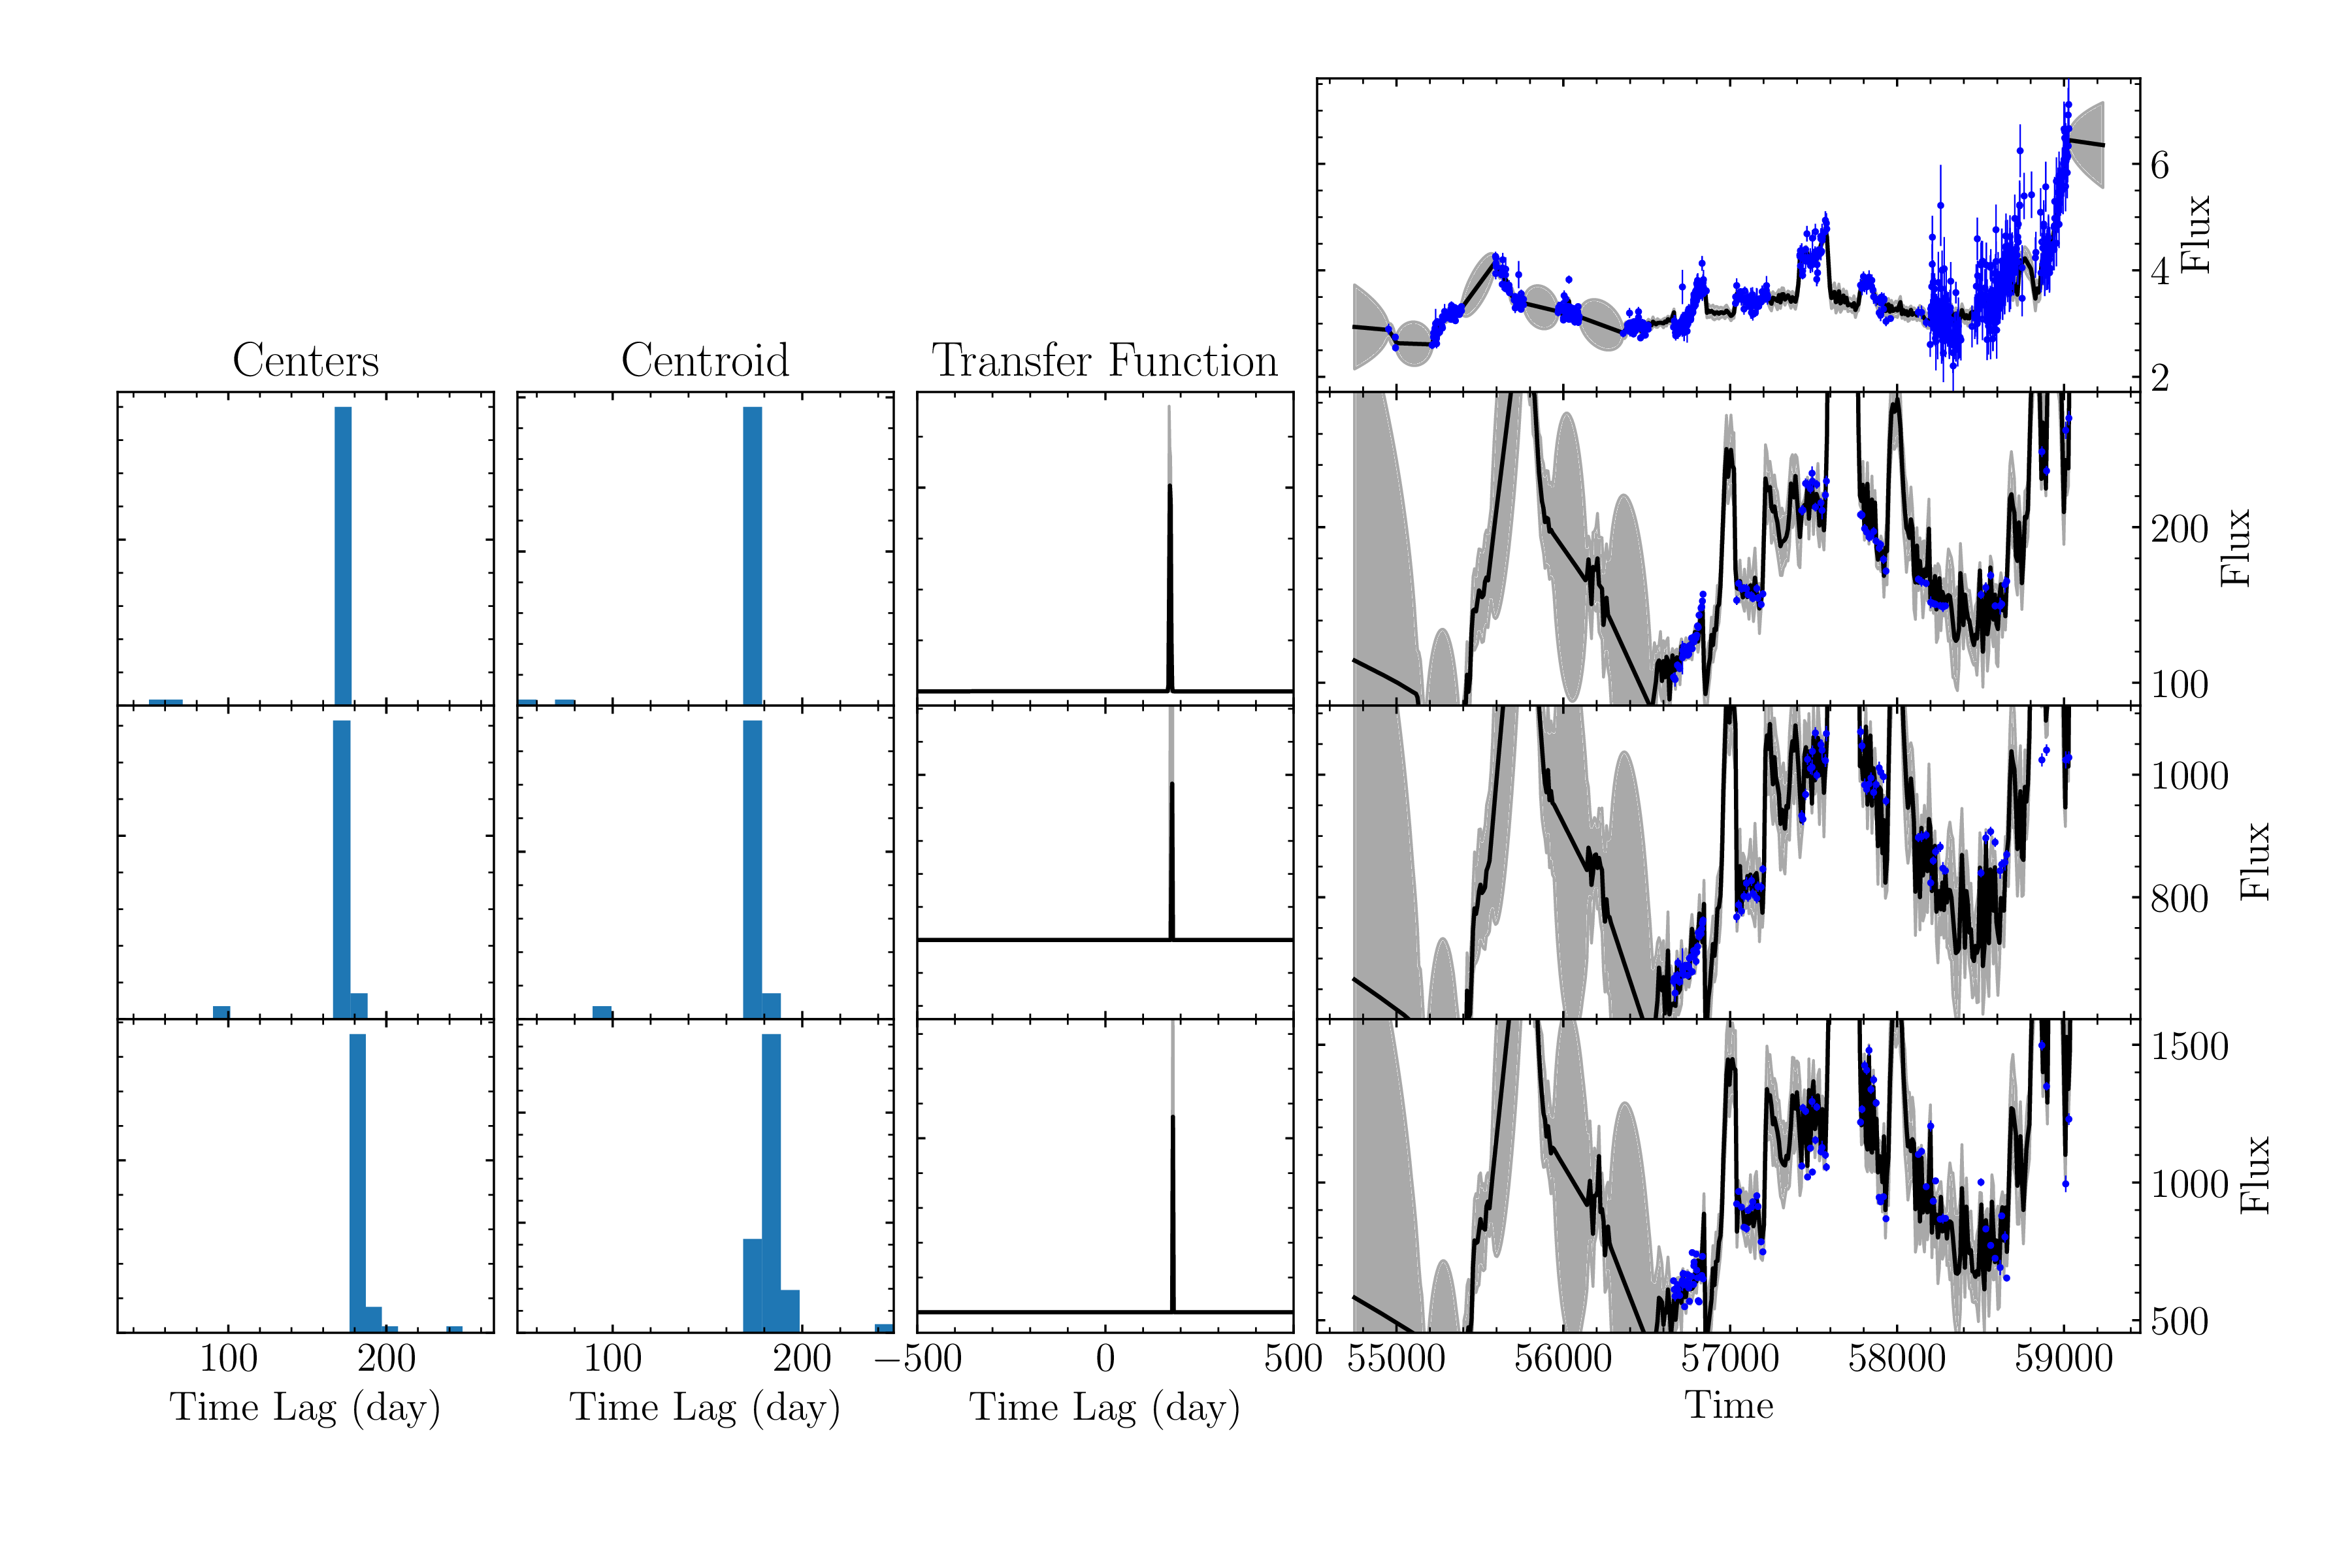

In [3]:
from wand.image import Image as WImage
WImage(filename='mica2_output4/mica2/data/fig_1.pdf', resolution=300)

We can see that (while the plot may look a bit funky), there are a decent amount of samples for each line (~50). For an actual run, we should specify a larger ``max_num_save``, but this displays the functionality well enough.

In addition, this run took much longer than the previous tutorials.

Looking at the lags:

In [7]:
import numpy as np

_, _, lags1 = np.loadtxt('mica2_output4/mica2/hb_lag_samples.dat', unpack=True, delimiter=',')
_, _, lags2 = np.loadtxt('mica2_output4/mica2/ha_lag_samples.dat', unpack=True, delimiter=',')
_, _, lags3 = np.loadtxt('mica2_output4/mica2/mg2_lag_samples.dat', unpack=True, delimiter=',')

print( np.median(lags1), np.median(lags2), np.median(lags3) )

172.128833 176.27570250000002 179.655222


It seems more samples are needed to properly distinguish the lags.

## Output

Instead of there being a ``mica2/`` directory for each line, now there will be only one directory for all MICA2 data: ``output_directory/mica2/``. This will contain the ``data/`` and ``param/`` directories, as well as the sample files for each line (and Gaussian index).